In [8]:
#!pip install -U altair vega_datasets notebook vega

In [19]:
!pip install -U jupyter

    100% |████████████████████████████████| 122kB 245kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/a7/9b1dd14ef45345f186ef69d175bdd2491c40ab1dfa4b2b3e4352df719ed7/prompt_toolkit-2.0.9-py3-none-any.whl
ipython 5.3.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.9 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.16
    Uninstalling prompt-toolkit-1.0.16:
      Successfully uninstalled prompt-toolkit-1.0.16


In [18]:
import IPython; IPython.__version__

'5.3.0'

In [16]:
import altair as alt
print('Altair version: ' + alt.__version__)
import pandas as pd
import numpy as np
from vega_datasets import data

alt.renderers.enable('notebook')

Altair version: 3.0.1


RendererRegistry.enable('notebook')

In [17]:
iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

Chart({
  data:      petalLength  petalWidth  sepalLength  sepalWidth    species
  0            1.4         0.2          5.1         3.5     setosa
  1            1.4         0.2          4.9         3.0     setosa
  2            1.3         0.2          4.7         3.2     setosa
  3            1.5         0.2          4.6         3.1     setosa
  4            1.4         0.2          5.0         3.6     setosa
  5            1.7         0.4          5.4         3.9     setosa
  6            1.4         0.3          4.6         3.4     setosa
  7            1.5         0.2          5.0         3.4     setosa
  8            1.4         0.2          4.4         2.9     setosa
  9            1.5         0.1          4.9         3.1     setosa
  10           1.5         0.2          5.4         3.7     setosa
  11           1.6         0.2          4.8         3.4     setosa
  12           1.4         0.1          4.8         3.0     setosa
  13           1.1         0.1          4.3     

In [11]:
url = 'https://raw.githubusercontent.com/datasett/maps/master/norway/data/fylker_2020_s_geojson.json'
data = alt.Data(url=url, format=alt.DataFormat(property='features',type='json'))

# chart object
alt.Chart(data).mark_geoshape(
).encode(
    color="properties.name:N"
).properties(
    projection={'type': 'identity', 'reflectY': True}
)

Chart({
  data: Data({
    format: DataFormat({
      property: 'features',
      type: 'json'
    }),
    url: 'https://raw.githubusercontent.com/datasett/maps/master/norway/data/fylker_2020_s_geojson.json'
  }),
  encoding: FacetedEncoding({
    color: Color({
      shorthand: 'properties.name:N'
    })
  }),
  mark: 'geoshape',
  projection: {'type': 'identity', 'reflectY': True}
})

In [5]:
url = 'https://storage.googleapis.com/vega-datasets/fylker.topo.json'

source = alt.topo_feature(url, 'fylker')

fig = alt.Chart(source).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=800,
    height=400
).project(
    type='equirectangular')

fig

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'fylker',
      type: 'topojson'
    }),
    url: 'https://storage.googleapis.com/vega-datasets/fylker.topo.json'
  }),
  height: 400,
  mark: MarkDef({
    fill: '#666666',
    stroke: 'white',
    type: 'geoshape'
  }),
  projection: Projection({
    type: 'equirectangular'
  }),
  width: 800
})

In [56]:
print(json.dumps(json.loads(fig.to_json()), indent=2))

{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.2.1.json",
  "config": {
    "mark": {
      "tooltip": null
    },
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "format": {
      "feature": "fylker",
      "type": "topojson"
    },
    "url": "https://github.com/mesiqi/maps/raw/master/geodata/norway/fylker-simple.topo.json"
  },
  "height": 400,
  "mark": {
    "fill": "#666666",
    "stroke": "white",
    "type": "geoshape"
  },
  "projection": {
    "type": "mercator"
  },
  "width": 800
}


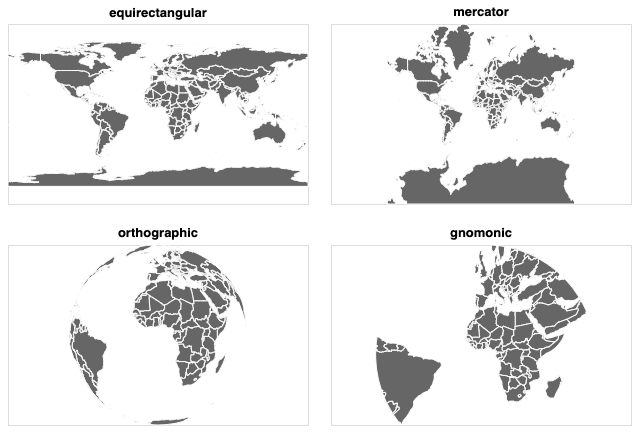

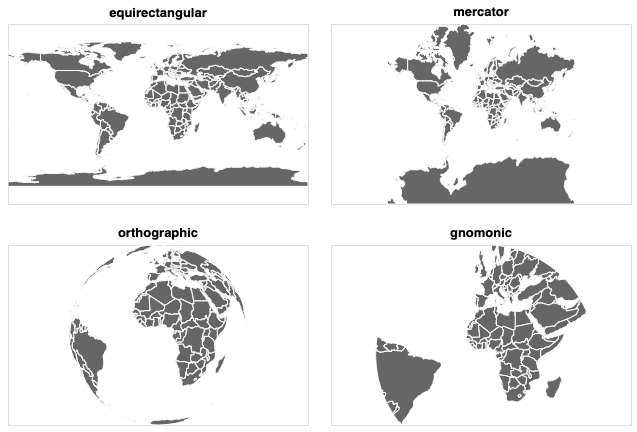

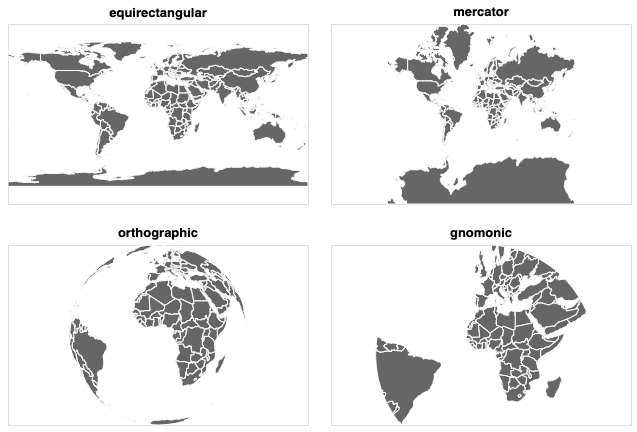

In [49]:
source = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(source).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=300,
    height=180
)

projections = ['equirectangular', 'mercator', 'orthographic', 'gnomonic']
charts = [base.project(proj).properties(title=proj)
          for proj in projections]

alt.concat(*charts, columns=2)

In [35]:
counties

UrlData({
  format: TopoDataFormat({
    feature: 'fylker',
    type: 'topojson'
  }),
  url: 'https://github.com/mesiqi/maps/raw/master/geodata/norway/fylker-simple.topo.json'
})